* Looking into the pandas documentation, I find that I can,

In [4]:
import pandas as pd

db=pd.read_csv("/home/nate/NextCloud/Roam/Classes/Intro_to_ML/assignmnets/data/JaipurFinalCleanData.csv")

so I can see that "pd.read." might then be able for the use of reading others sorts of data types.

* So how can I print out the first five rows?
I didn't find much within the docs, but I did find a understanding from using Google's Gemini. Dataframes objects like 'db' have methods, and here 'head' is one. It is able to print off the first 10 lines of a object, but here it's the dataframe; the former comes from old Unix commands.

In [3]:
import pandas as pd

db=pd.read_csv("/home/nate/NextCloud/Roam/Classes/Intro_to_ML/assignmnets/data/JaipurFinalCleanData.csv")

print(db.head())

        jdate  mean_temperature  max_temperature  min_temperature  \
0  2016-05-04                34               41               27   
1  2016-05-05                31               38               24   
2  2016-05-06                28               34               21   
3  2016-05-07                30               38               23   
4  2016-05-08                34               41               26   

   Mean_dew_pt  mean_pressure  max_humidity  min_humidity  max_dew_pt_1  \
0            6        1006.00            27             5            12   
1            7        1005.65            29             6            13   
2           11        1007.94            61            13            16   
3           13        1008.39            69            18            17   
4           10        1007.62            50             8            14   

   max_dew_pt_2  min_dew_pt_1  min_dew_pt_2  max_pressure_1  max_pressure_2  \
0            10            -2            -2            


I actually had to use ":results output" in the org-babel block as without only the last line which returns a value will show; print() doesn't output a value but instead a string which is printed to the terminal.

* At this point I can now start to preform some data analysis
Im thinking that I could preform all in one block, each using the same numerical columns.
** Mean
I would assume that Im getting the mean of both of the numerical columns which I have picked, which would be min_pressure_2  ;and rainfall where the former would then be the mean of the min_pressure.

 ;looking into the docs I see that pandas can,

In [6]:
import pandas as pd

db=pd.read_csv("/home/nate/NextCloud/Roam/Classes/Intro_to_ML/assignmnets/data/JaipurFinalCleanData.csv")
mean_tr=db[["min_pressure_2", "rainfall"]].mean()

print(mean_tr)

min_pressure_2    1005.266272
rainfall             1.250592
dtype: float64


** The rest is the same process, so how could I make this faster/smaller?

In [7]:
import pandas as pd
db=pd.read_csv("/home/nate/NextCloud/Roam/Classes/Intro_to_ML/assignmnets/data/JaipurFinalCleanData.csv")

agg_db=db.agg(
    {
        "min_pressure_2": ["mean", "median", "std", "var"],
        "rainfall": ["mean", "median", "std", "var" ],
    }
)

print(agg_db)

        min_pressure_2   rainfall
mean       1005.266272   1.250592
median     1004.000000   0.000000
std           7.133237   5.435659
var          50.883068  29.546385


*** Mode cannot be gained through this method as mode can sometimes produce a series.
Meaning, in some sense, it will output a interval of mode, and this format is only for a single value. Instead, I have to find the mode separately if I don't want to completely overhaul the prior method.

In [8]:
import pandas as pd

db=pd.read_csv("/home/nate/NextCloud/Roam/Classes/Intro_to_ML/assignmnets/data/JaipurFinalCleanData.csv")
mode_tr=db[["min_pressure_2", "rainfall"]].mode()

print(mode_tr)

   min_pressure_2  rainfall
0             999       0.0
1            1014       NaN


* With some stats, let's get more visually.
I'm going to make a Histogram & a Scatterplot; the former is going to be for rainfall while the latter will include both.
** Histogram for Rainfall.
Before creating such graphs with Pandas, you actually need to install and use the package matplotlib with it's pyplot method.

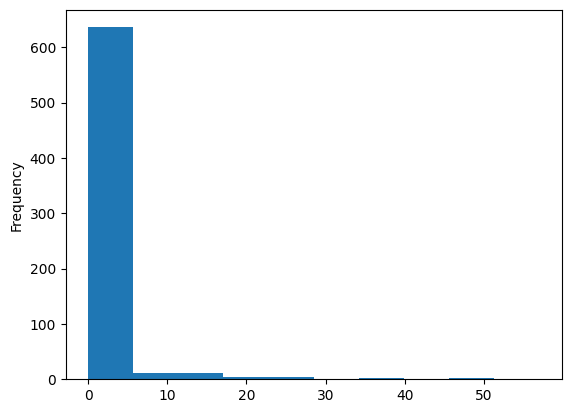

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

db=pd.read_csv("/home/nate/NextCloud/Roam/Classes/Intro_to_ML/assignmnets/data/JaipurFinalCleanData.csv")
db["rainfall"].plot.hist()

plt.savefig("rainfall_histogram.png")

*** Looking at the histogram,
I find I'm first confused about what the x-axes might be, but looking at the printed head I see that it's likely the number of days after the collection started. This would then tell me that only after the first initial days was there rainfall at all, after that it become almost linearly flat.

** Scatterplot for both rainfall & min_pressure_2
Had to re-write the line for getting the scatter plot of the two column, as I'm using two columns now instead of one!

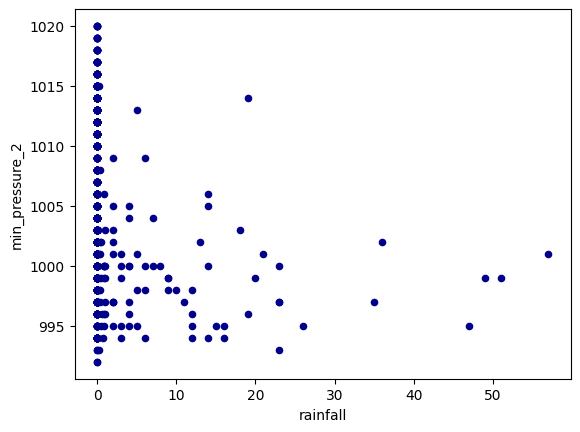

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

db=pd.read_csv("/home/nate/NextCloud/Roam/Classes/Intro_to_ML/assignmnets/data/JaipurFinalCleanData.csv")
db.plot.scatter(x="rainfall", y="min_pressure_2", color="DarkBlue")

plt.savefig("rainfall&min_pressure_2_scatter.png")


*** Looking at the scatterplot,
I notice that in the beginning there is the highest amount of min pressure with no rainfall, but as the rainfall starts to increase sightly the amount of the min pressure decresses, seeming to stablize towards in the lower end no matter the amount of rainlevel.